# Group 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#setting plotting and display options
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

# Dataset chosen from Kaggle: Reservation Cancellation Prediction dataset
### https://www.kaggle.com/competitions/playground-series-s3e7/data

In [3]:
#data pre-processing
data=pd.read_csv('train.csv',index_col=0)

# The data contains 42100 rows and 18 columns 
#booking_status is the target (e.g., whether the reservation was cancelled)

In [4]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0


# Data preprocessing
### 1. Missing value imputation

In [5]:
data.isna().all()
#all columns return false, therefore no missing values

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

### 2. Feature scaling

In [6]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [7]:
data.describe()
# the big spread in mean, min and max shows that we will definitely be scaling our features

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


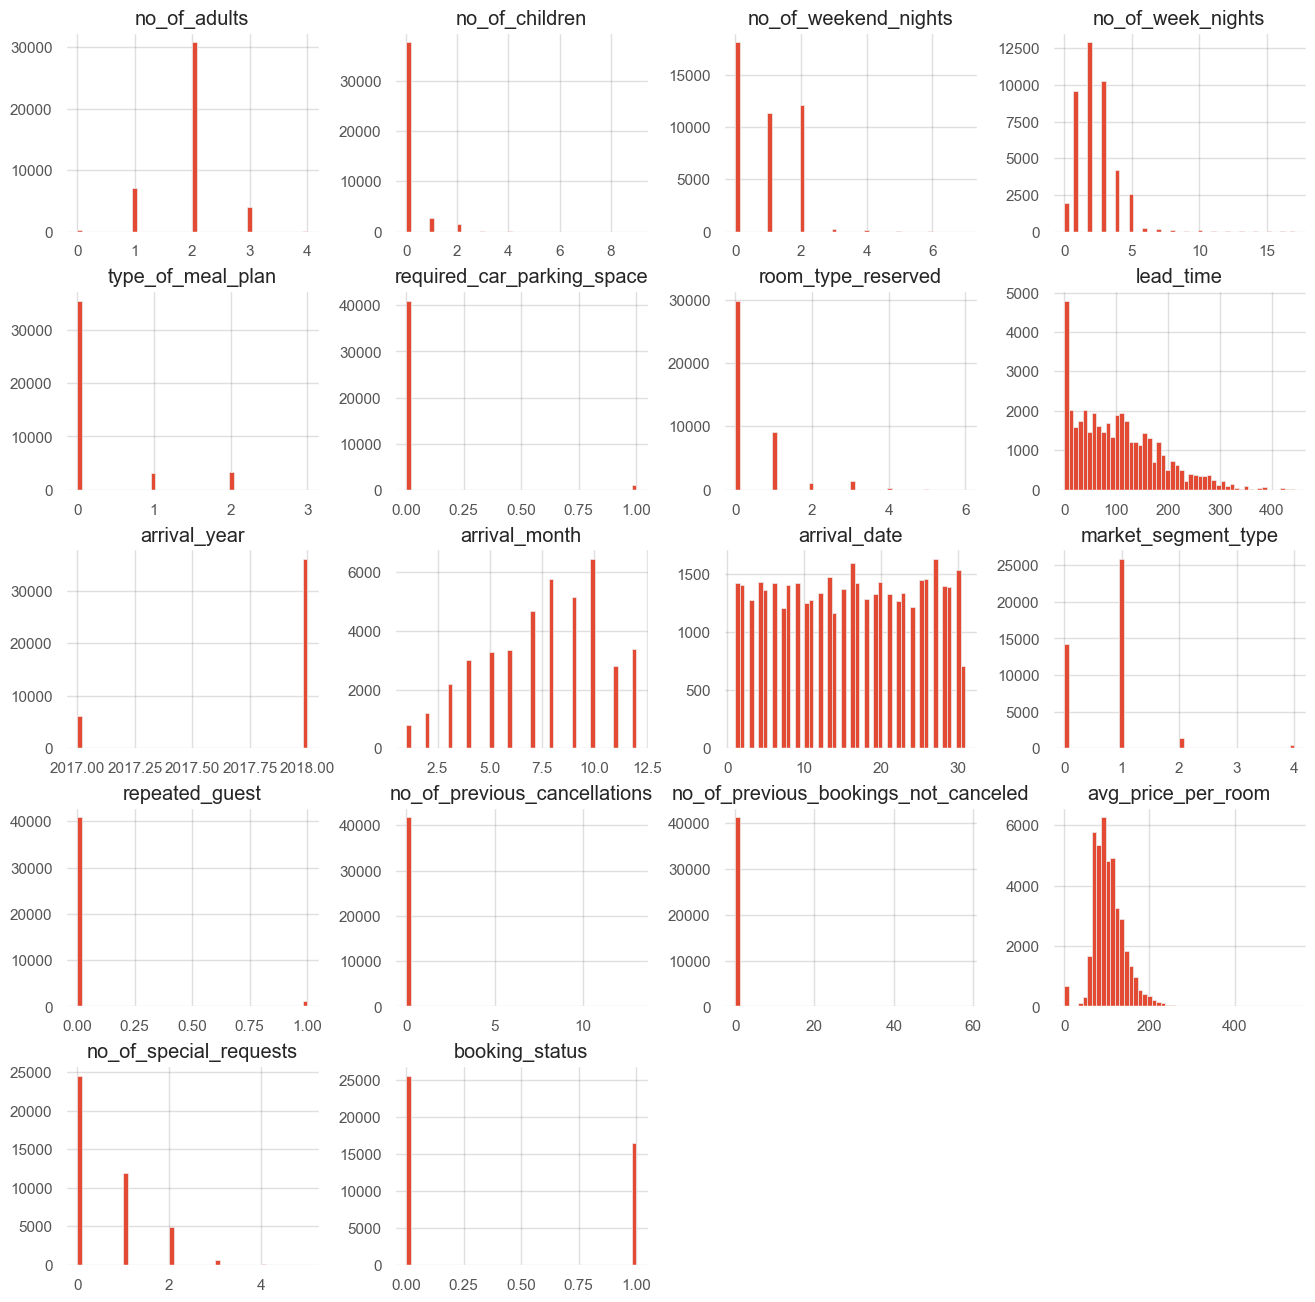

In [8]:
#EDA to see distribution of features
data.hist(bins = 50,
          sharex = False,
          sharey = False,
          figsize = (16, 16)
         )
plt.show()

In [9]:
y=data['booking_status']
X = data.drop('booking_status', axis=1)

# Perform feature scaling on X
## standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
## minmaxscaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [10]:
# manual feature scaling
X_scaled_2 = (X - X.mean())/X.std() 
X_scaled_2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
id,,,,,,,,,,,,,,,,,
0,0.151038,-0.31345,-0.998802,-0.278846,1.294609,-0.160944,-0.515167,-1.170455,0.409657,-2.330370,-0.214089,0.428546,5.766689,33.698719,-0.101478,-0.998040,-0.737683
1,0.151038,-0.31345,0.130258,-0.278846,-0.407016,-0.160944,-0.515167,0.161738,0.409657,-0.209776,1.473469,-1.149914,-0.173406,-0.060506,-0.101478,-0.870143,-0.737683
2,0.151038,-0.31345,-0.998802,-0.979455,-0.407016,-0.160944,-0.515167,2.604091,0.409657,1.557386,-1.564135,-1.149914,-0.173406,-0.060506,-0.101478,-1.415389,-0.737683
3,-1.753904,-0.31345,-0.998802,-0.278846,1.294609,-0.160944,-0.515167,-0.886747,0.409657,1.557386,-1.676639,0.428546,-0.173406,-0.060506,-0.101478,-1.307686,-0.737683
4,0.151038,-0.31345,0.130258,-1.680064,-0.407016,-0.160944,-0.515167,1.900990,0.409657,0.850521,0.010919,-1.149914,-0.173406,-0.060506,-0.101478,-0.122953,-0.737683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.055980,-0.31345,-0.998802,1.122372,-0.407016,-0.160944,0.685882,0.692148,0.409657,1.557386,1.585973,0.428546,-0.173406,-0.060506,-0.101478,0.954077,1.842827
42096,0.151038,-0.31345,-0.998802,0.421763,-0.407016,-0.160944,-0.515167,-0.862077,-2.441011,0.497089,0.798446,-1.149914,-0.173406,-0.060506,-0.101478,3.233881,-0.737683
42097,0.151038,-0.31345,-0.998802,-0.278846,2.996233,-0.160944,-0.515167,2.320384,0.409657,-0.209776,0.573438,-1.149914,-0.173406,-0.060506,-0.101478,-0.230656,-0.737683


### 3. Encoding categorical variables

In [11]:
# Due to the nature of the data. There is no need for any encoding categorical variable.
# We only need to do encoding if there are categorical variables in our data. 

In [12]:
np.unique(y) # checking the unique value in our target/label

array([0, 1])

### 4. Split the dataset into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2023)
# 70% training sets and 30% validation sets

# Fit an unregularized logistic regression model

### First option

In [14]:
from sklearn.linear_model import LogisticRegression
unreg_log_reg=LogisticRegression(solver='saga', max_iter=10000)

unreg_log_reg.fit(x_train, y_train)
print(unreg_log_reg.intercept_, unreg_log_reg.coef_)

[-0.724] [[ 0.034  0.04   0.069  0.05   0.03  -0.255 -0.248  0.968  0.196 -0.056
   0.034  0.738 -0.756  0.041  0.02   0.711 -0.918]]


In [15]:
# create a dataframe for the coefficients
coeff_df = pd.DataFrame({'feature': X.columns, 'coefficient': unreg_log_reg.coef_[0]})

# display the dataframe
print(coeff_df)

                                 feature  coefficient
0                           no_of_adults     0.034374
1                         no_of_children     0.040148
2                   no_of_weekend_nights     0.069238
3                      no_of_week_nights     0.049842
4                      type_of_meal_plan     0.029547
5             required_car_parking_space    -0.254877
6                     room_type_reserved    -0.247873
7                              lead_time     0.967745
8                           arrival_year     0.196352
9                          arrival_month    -0.056466
10                          arrival_date     0.033576
11                   market_segment_type     0.737987
12                        repeated_guest    -0.755719
13          no_of_previous_cancellations     0.040798
14  no_of_previous_bookings_not_canceled     0.019696
15                    avg_price_per_room     0.711093
16                no_of_special_requests    -0.917798


### Second option

In [16]:
import statsmodels.api as sm
model = sm.Logit(y_train, sm.add_constant(x_train))
unreg_logit = model.fit()
unreg_logit.summary()

Optimization terminated successfully.
         Current function value: 0.486819
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29470
Model:                          Logit   Df Residuals:                    29452
Method:                           MLE   Df Model:                           17
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.2729
Time:                        16:07:03   Log-Likelihood:                -14347.
converged:                       True   LL-Null:                       -19732.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7250      0.019    -37.651      0.000      -0.763      -0.687
x1             0.0343      0.016      2.118      0.034       0.003       0.066
x2             0.0402      0.017      2.307      0.021       0.006       0.074
x3             0.0693      0.015      4.655      0.000       0.040       0.098
x4             0.0498      0.015      3.322      0.001       0.020       0.079
x5             0.0295      0.015      1.955      0.051   -7.47e-05       0.059
x6            -0.2550      0.021    -12.149      0.000      -0.296      -0.214
x7            -0.2481      0.019    -12.824      0.000      -0.286      -0.210
x8             0.9681      0.018     54.889      0.000       0.934       1.003
x9             0.1963      0.019     10.455      0.000       0.159       0.233
x10           -0.0565      0.016     -3.446      0.001      -0.089      -0.024
x11            0.0336      0.015      2.306      0.021       0.005       0.062
x12            0.7385      0.018     40.540      0.000       0.703       0.774
x13           -0.7622      0.087     -8.746      0.000      -0.933      -0.591
x14            0.0418      0.065      0.648      0.517      -0.085       0.168
x15            0.0226      0.076      0.296      0.767      -0.127       0.172
x16            0.7115      0.021     34.558      0.000       0.671       0.752
x17           -0.9183      0.018    -50.994      0.000      -0.954      -0.883
==============================================================================
"""

## Model evaluation

### Accuracy (We will using result from first option)

In [17]:
y_pred_unreg_train = unreg_log_reg.predict(x_train)
y_pred_unreg = unreg_log_reg.predict(x_test)

In [18]:
print("Training Set Accuracy:", (y_pred_unreg_train == y_train).mean())
print("Test Set Accuracy:", (y_pred_unreg == y_test).mean())

Training Set Accuracy: 0.769664065151001
Test Set Accuracy: 0.7655581947743468


In [19]:
from sklearn import metrics
print("Training Set Accuracy:", metrics.accuracy_score(y_train, y_pred_unreg_train))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_pred_unreg))

Training Set Accuracy: 0.769664065151001
Test Set Accuracy: 0.7655581947743468


### Confusion matrix

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred_unreg)
cm

array([[6363, 1310],
       [1651, 3306]])

$\begin{aligned}
Accuracy &= \frac{TP + FN}{TP + FP + TN + FN} \\ \\
Precision &= \frac{TP}{TP + FP} \\ \\
Recall &= \frac{TP}{TP + FN} \\ \\
\end{aligned}$

In [21]:
# manual method
a = cm[0, 0]
b = cm[1, 0]
c = cm[0, 1]
d = cm[1, 1]

print("Accuracy Manual:", (a + d) / (a + b + c + d))
print("Precision Manual:", d / (c + d))
print("Recall Manual:", d / (b + d))

Accuracy Manual: 0.7655581947743468
Precision Manual: 0.7162045060658578
Recall Manual: 0.6669356465604196


In [22]:
# sklearn metrics method
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred_unreg))
print('Accuracy:', accuracy_score(y_test, y_pred_unreg))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg       0.76      0.77      0.76     12630

Accuracy: 0.7655581947743468


In [23]:
print("Accuracy sklearn:", metrics.accuracy_score(y_test, y_pred_unreg))
print("Precision sklearn:", metrics.precision_score(y_test,y_pred_unreg))
print("Recall sklearn:", metrics.recall_score(y_test,y_pred_unreg))

Accuracy sklearn: 0.7655581947743468
Precision sklearn: 0.7162045060658578
Recall sklearn: 0.6669356465604196


## Apply L1 (Lasso), L2 (Ridge), and Elastic Net regularization

### Experimenting with different regularization strengths: C -inverse of regularization strength (hyper-parameter tuning)


-------------------------------------------------------------------- Lasso-----------------------------------------------------------------------------------------

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Define the parameter grid to search over
param_grid_lasso = {'C': [0.001, 0.01, 0.1, 1, 10,20,50,100]}

# Create a L1 logistic regression model
lasso_log_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=2023)

# Create a grid search object to find the best value of C using cv parameters defined
lasso_grid_search  = GridSearchCV(lasso_log_reg, param_grid_lasso, cv=cv)

# Fit the grid search object to the training data
lasso_grid_search.fit(x_train, y_train)

#print out cross_val_score for comparison later
lasso_scores = cross_val_score(lasso_grid_search.best_estimator_, x_train, y_train, cv=cv)
lasso_mean_score = np.mean(lasso_scores)
lasso_std_score = np.std(lasso_scores)

print("Lasso_CV_mean:", lasso_mean_score)
print("Lasso_CV_std:", lasso_std_score)

# Print the best value of C found by the grid search
print('Best C:', lasso_grid_search.best_params_['C'])

# Fit a new logistic regression model with best value of C
lasso_log_reg_best = LogisticRegression(penalty='l1', C=lasso_grid_search.best_params_['C'], solver='saga', max_iter=10000)
lasso_log_reg_best.fit(x_train, y_train)
print(lasso_log_reg_best.intercept_, lasso_log_reg_best.coef_)

Lasso_CV_mean: 0.7692568713946387
Lasso_CV_std: 0.010812806811668848
Best C: 50
[-0.725] [[ 0.034  0.04   0.069  0.05   0.03  -0.255 -0.248  0.968  0.196 -0.057
   0.034  0.738 -0.761  0.042  0.022  0.712 -0.918]]


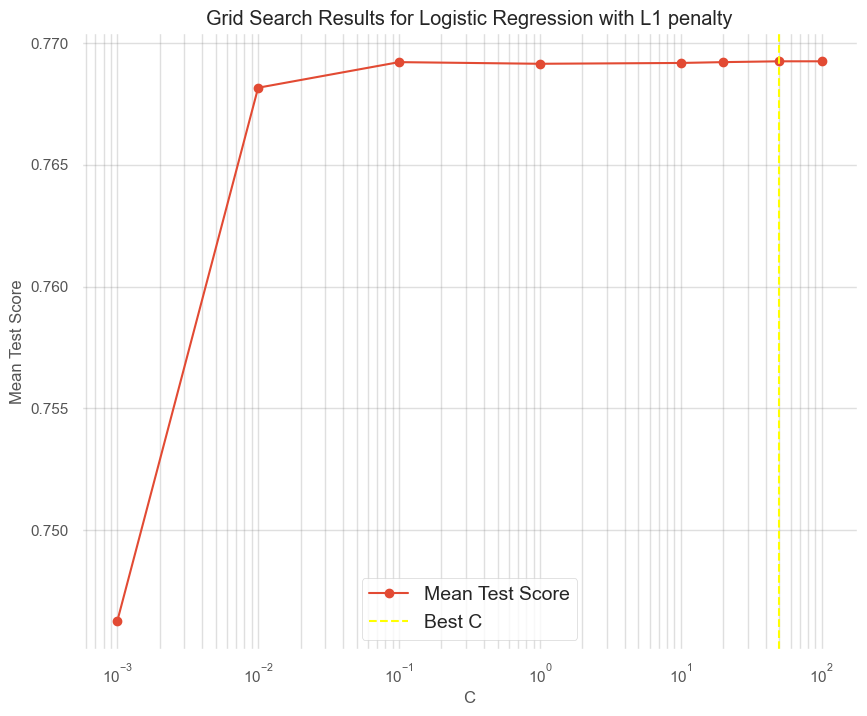

In [25]:
# Plot the mean test score for each value of C
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(param_grid_lasso['C'], lasso_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')
ax.axvline(x=lasso_grid_search.best_params_['C'], color='yellow', linestyle='--', label='Best C')

ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for Logistic Regression with L1 penalty')

ax.legend()
ax.grid(True, which='both')
plt.show()

In [26]:
# create a dataframe for the coefficients
coeff_df_lasso = pd.DataFrame({'feature': X.columns, 'coefficient': lasso_log_reg_best.coef_[0]})

# display the dataframe
print(coeff_df_lasso)

                                 feature  coefficient
0                           no_of_adults     0.034308
1                         no_of_children     0.040145
2                   no_of_weekend_nights     0.069271
3                      no_of_week_nights     0.049823
4                      type_of_meal_plan     0.029501
5             required_car_parking_space    -0.255008
6                     room_type_reserved    -0.248125
7                              lead_time     0.968126
8                           arrival_year     0.196295
9                          arrival_month    -0.056534
10                          arrival_date     0.033595
11                   market_segment_type     0.738486
12                        repeated_guest    -0.761283
13          no_of_previous_cancellations     0.041744
14  no_of_previous_bookings_not_canceled     0.021878
15                    avg_price_per_room     0.711536
16                no_of_special_requests    -0.918268


-------------------------------------------------------------------- Ridge-----------------------------------------------------------------------------------------

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,20,50,100]}

# Create a L2 logistic regression model
ridge_log_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=2023)

# Create a grid search object to find the best value of C using cv parameters defined
ridge_grid_search = GridSearchCV(ridge_log_reg, param_grid, cv=cv)

# Fit the grid search object to the training data
ridge_grid_search.fit(x_train, y_train)

#print out cross_val_score for comparison later
ridge_scores = cross_val_score(ridge_grid_search.best_estimator_, x_train, y_train, cv=cv)
ridge_mean_score = np.mean(ridge_scores)
ridge_std_score = np.std(ridge_scores)

print("ridge_CV_mean:", ridge_mean_score)
print("ridge_CV_std:", ridge_std_score)

# Print the best value of C found by the grid search
print('Best C:', ridge_grid_search.best_params_['C'])

# Fit a new logistic regression model with best value of C
ridge_log_reg_best = LogisticRegression(penalty='l2', C=ridge_grid_search.best_params_['C'], solver='saga', max_iter=10000)
ridge_log_reg_best.fit(x_train, y_train)
print(ridge_log_reg_best.intercept_, ridge_log_reg_best.coef_)

ridge_CV_mean: 0.7692568713946387
ridge_CV_std: 0.010605293440443862
Best C: 0.1
[-0.718] [[ 3.490e-02  4.009e-02  6.891e-02  4.997e-02  2.993e-02 -2.536e-01
  -2.455e-01  9.643e-01  1.968e-01 -5.581e-02  3.336e-02  7.335e-01
  -7.119e-01  3.320e-02  6.738e-04  7.070e-01 -9.135e-01]]


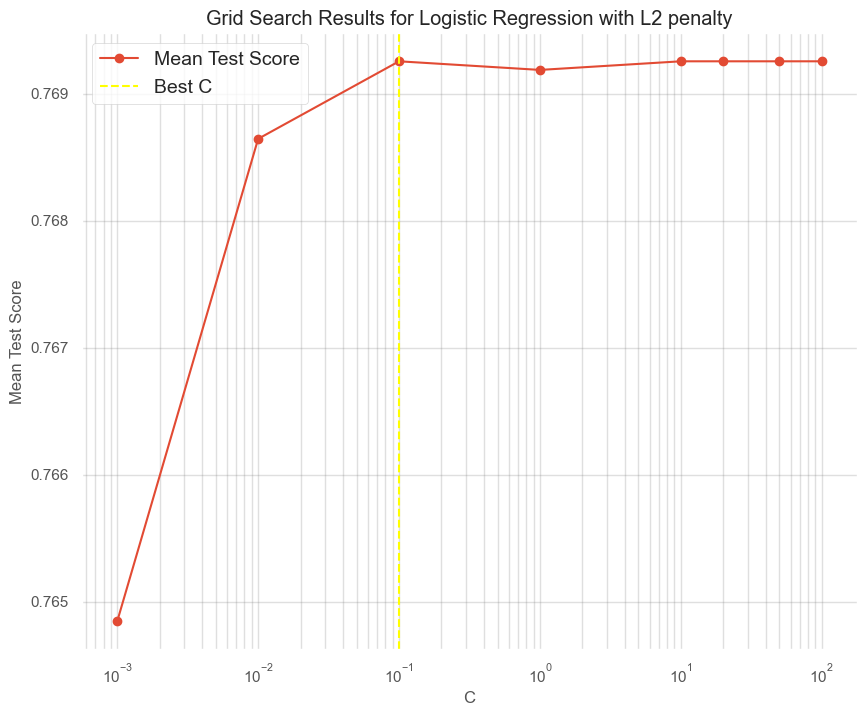

In [28]:
# Plot the mean test score for each value of C
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(param_grid['C'], ridge_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')
ax.axvline(x=ridge_grid_search.best_params_['C'], color='yellow', linestyle='--', label='Best C')

ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for Logistic Regression with L2 penalty')

ax.legend()
ax.grid(True, which='both')
plt.show()

In [29]:
# create a dataframe for the coefficients
coeff_df_ridge = pd.DataFrame({'feature': X.columns, 'coefficient': ridge_log_reg_best.coef_[0]})

# display the dataframe
print(coeff_df_ridge)

                                 feature  coefficient
0                           no_of_adults     0.034904
1                         no_of_children     0.040094
2                   no_of_weekend_nights     0.068911
3                      no_of_week_nights     0.049968
4                      type_of_meal_plan     0.029927
5             required_car_parking_space    -0.253619
6                     room_type_reserved    -0.245514
7                              lead_time     0.964253
8                           arrival_year     0.196842
9                          arrival_month    -0.055808
10                          arrival_date     0.033364
11                   market_segment_type     0.733466
12                        repeated_guest    -0.711937
13          no_of_previous_cancellations     0.033200
14  no_of_previous_bookings_not_canceled     0.000674
15                    avg_price_per_room     0.707028
16                no_of_special_requests    -0.913493


-------------------------------------------------------------------- Elastic Net-----------------------------------------------------------------------------------

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100],
    'l1_ratio': [i / 10 for i in range(0, 11)]
}

# Create a L1 logistic regression model
elastic_net_log_reg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=2023)

# Create a grid search object to find the best value of C using cv parameters defined
elastic_net_grid_search = GridSearchCV(elastic_net_log_reg, param_grid, cv=5)

# Fit the grid search object to the training data
elastic_net_grid_search.fit(x_train, y_train)

#print out cross_val_score for comparison later
elastic_net_scores = cross_val_score(elastic_net_grid_search.best_estimator_, x_train, y_train, cv=cv)
elastic_net_mean_score = np.mean(elastic_net_scores)
elastic_net_std_score = np.std(elastic_net_scores)

print("elastic_net_CV_mean:", elastic_net_mean_score)
print("elastic_net_CV_std:", elastic_net_std_score)

# Print the best value of C and l1 ratio found by the grid search
print('Best C:', elastic_net_grid_search.best_params_['C'])
print('Best L1/L2 ratio',elastic_net_grid_search.best_params_['l1_ratio'])

elastic_net_log_reg_best = LogisticRegression(penalty='elasticnet', C=elastic_net_grid_search.best_params_['C'],
                                              l1_ratio=elastic_net_grid_search.best_params_['l1_ratio'],solver='saga', max_iter=10000)
elastic_net_log_reg_best.fit(x_train, y_train)
print(elastic_net_log_reg_best.intercept_, elastic_net_log_reg_best.coef_)

elastic_net_CV_mean: 0.7693586698337292
elastic_net_CV_std: 0.01059339815723409
Best C: 0.1
Best L1/L2 ratio 0.2
[-0.717] [[ 0.034  0.039  0.069  0.05   0.029 -0.253 -0.245  0.964  0.196 -0.055
   0.033  0.733 -0.706  0.024  0.     0.707 -0.913]]


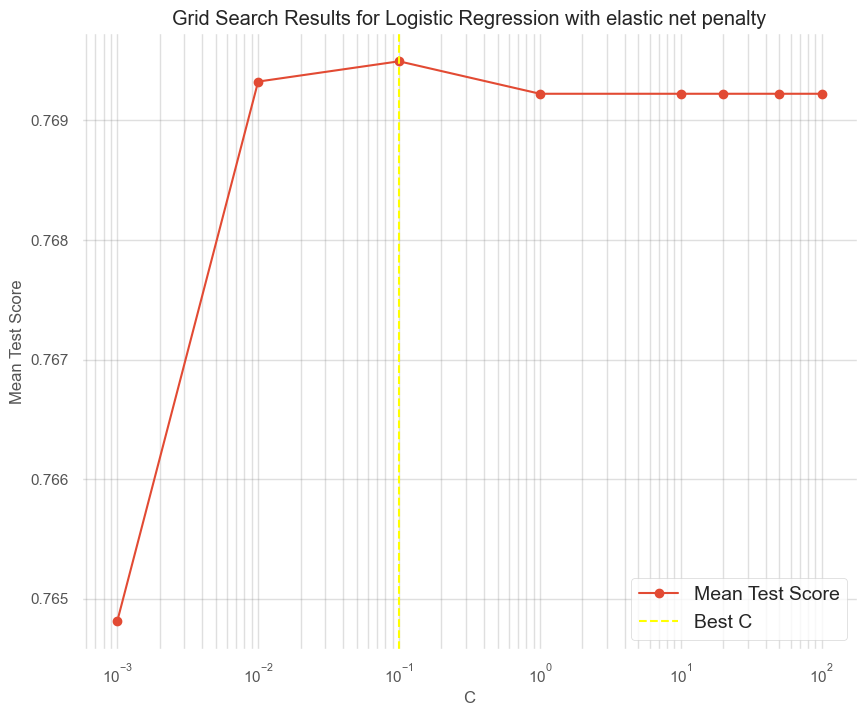

In [31]:
# Plot the mean test score for each value of C
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(param_grid['C'], elastic_net_grid_search.cv_results_['mean_test_score'][ : :11], marker='o', label='Mean Test Score')
ax.axvline(x=elastic_net_grid_search.best_params_['C'], color='yellow', linestyle='--', label='Best C')

ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Mean Test Score')
ax.set_title('Grid Search Results for Logistic Regression with elastic net penalty')

ax.legend()
ax.grid(True, which='both')
plt.show()

In [32]:
# create a dataframe for the coefficients
coeff_df_elastic_net = pd.DataFrame({'feature': X.columns, 'coefficient': elastic_net_log_reg_best.coef_[0]})

# display the dataframe
print(coeff_df_elastic_net)

                                 feature  coefficient
0                           no_of_adults     0.034371
1                         no_of_children     0.039278
2                   no_of_weekend_nights     0.068606
3                      no_of_week_nights     0.049593
4                      type_of_meal_plan     0.029458
5             required_car_parking_space    -0.252953
6                     room_type_reserved    -0.244607
7                              lead_time     0.964248
8                           arrival_year     0.196477
9                          arrival_month    -0.055475
10                          arrival_date     0.033001
11                   market_segment_type     0.733016
12                        repeated_guest    -0.705893
13          no_of_previous_cancellations     0.024223
14  no_of_previous_bookings_not_canceled     0.000000
15                    avg_price_per_room     0.706881
16                no_of_special_requests    -0.913151


# Model comparison and discussion

In [33]:
# Compare the performance of the three models
print('Lasso mean cross-validation score:', lasso_mean_score, '+/-', lasso_std_score)
print('Ridge mean cross-validation score:', ridge_mean_score,'+/-', ridge_std_score)
print('Elastic Net mean cross-validation score:', elastic_net_mean_score, '+/-', elastic_net_std_score)

#from their cross-val score, it doesn't say much which model is actually better

Lasso mean cross-validation score: 0.7692568713946387 +/- 0.010812806811668848
Ridge mean cross-validation score: 0.7692568713946387 +/- 0.010605293440443862
Elastic Net mean cross-validation score: 0.7693586698337292 +/- 0.01059339815723409


-------------------------------------------------- Unregularized --------------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg       0.76      0.77      0.76     12630

Accuracy Unregularized: 0.7655581947743468
Precision Unregularized: 0.7162045060658578
Recall Unregularized: 0.6669356465604196


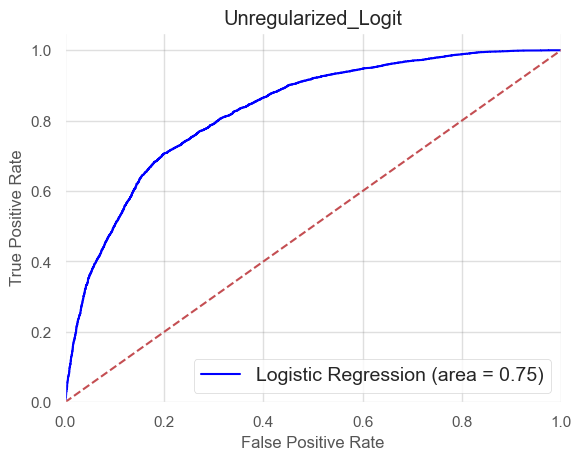


--------------------------------------------------- Regularized ---------------------------------------------------

Lasso
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg       0.76      0.77      0.76     12630

Accuracy Lasso: 0.7655581947743468
Precision Lasso: 0.7162045060658578
Recall Lasso: 0.6669356465604196


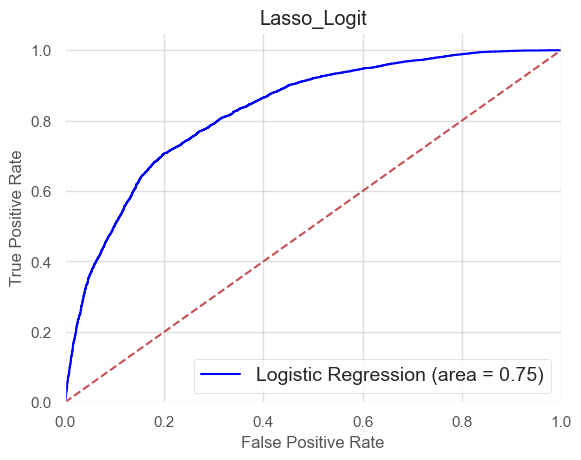


Ridge
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg       0.76      0.77      0.76     12630

Accuracy Ridge: 0.7655581947743468
Precision Ridge: 0.7164859002169197
Recall Ridge: 0.6663304417994755


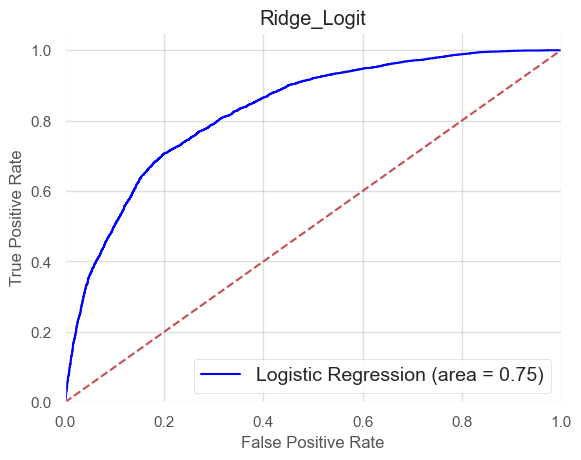


Elastic Net
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7673
           1       0.72      0.67      0.69      4957

    accuracy                           0.77     12630
   macro avg       0.76      0.75      0.75     12630
weighted avg       0.76      0.77      0.76     12630

Accuracy Elastic Net: 0.7657165479018211
Precision Elastic Net: 0.7166088464874241
Recall Elastic Net: 0.6667339116401049


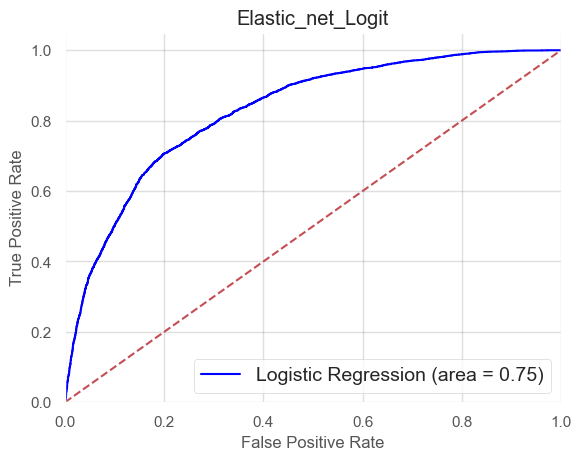

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Make predictions on the test data for each of the L1, L2, elastic net model
y_pred_lasso = lasso_log_reg_best.predict(x_test)
y_pred_ridge = ridge_log_reg_best.predict(x_test)
y_pred_elastic_net = elastic_net_log_reg_best.predict(x_test)

def auc_plotter(y_pred, y_pred_prob, model: str):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[ : ,1])
    plt.figure()
    plt.plot(fpr, tpr, color = "blue", label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model)
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
# Print the classification report and accuracy score
## unregularized
print("-------------------------------------------------- Unregularized --------------------------------------------------\n")
print(classification_report(y_test, y_pred_unreg))
print("Accuracy Unregularized:", metrics.accuracy_score(y_test, y_pred_unreg))
print("Precision Unregularized:", metrics.precision_score(y_test,y_pred_unreg))
print("Recall Unregularized:", metrics.recall_score(y_test,y_pred_unreg))

auc_plotter(y_pred_unreg, unreg_log_reg.predict_proba(x_test), "Unregularized_Logit")

## regularized
print("\n--------------------------------------------------- Regularized ---------------------------------------------------\n")
print("Lasso")
print(classification_report(y_test, y_pred_lasso))
print("Accuracy Lasso:", metrics.accuracy_score(y_test, y_pred_lasso))
print("Precision Lasso:", metrics.precision_score(y_test,y_pred_lasso))
print("Recall Lasso:", metrics.recall_score(y_test,y_pred_lasso))

auc_plotter(y_pred_lasso, lasso_log_reg_best.predict_proba(x_test), "Lasso_Logit")

print("\nRidge")
print(classification_report(y_test, y_pred_ridge))
print("Accuracy Ridge:", metrics.accuracy_score(y_test, y_pred_ridge))
print("Precision Ridge:", metrics.precision_score(y_test,y_pred_ridge))
print("Recall Ridge:", metrics.recall_score(y_test,y_pred_ridge))

auc_plotter(y_pred_lasso, ridge_log_reg_best.predict_proba(x_test), "Ridge_Logit")

print("\nElastic Net")
print(classification_report(y_test, y_pred_elastic_net))
print("Accuracy Elastic Net:", metrics.accuracy_score(y_test, y_pred_elastic_net))
print("Precision Elastic Net:", metrics.precision_score(y_test,y_pred_elastic_net))
print("Recall Elastic Net:", metrics.recall_score(y_test,y_pred_elastic_net))

auc_plotter(y_pred_lasso, elastic_net_log_reg_best.predict_proba(x_test), "Elastic_net_Logit")

##  Trade-offs between model complexity, generalization, and the effects of regularization on model coefficients.

In general, a regularized logistic regression model will perform better than an unregularized model in cases where overfitting is a concern. it addresses overfitting by adding a penalty term to the loss function that encourages smaller magnitude weights. 

That said, for our particular dataset the unregularized and regularized performance are largely similar, this implies that regularization did not have a significant impact on the performance of the logistic regression models. This can occur when the dataset is not too complex or noisy and the unregularized model is not overfitting to begin with. In this case, the regularization term may not have had a significant impact on the model coefficients, and the model was able to generalize well to new data without the need for regularization. 

It is also possible that the regularization parameter was not chosen optimally, though we have applied grid search to find the optimum penalties for respective models. One way to find solution for this issue is to extend the range of C to find its exact optimal value, but this will incur additional processing time as well.

If we look into model performance in validation set, elastic net performs slightly better compared to the other models in terms of accuracy, precision and recall.

# Feature selection

### Comparing the coefficients of the different models.

In [35]:
# Merge the dataframes on the 'feature' column
coeff_df = coeff_df_lasso.merge(coeff_df_ridge, on='feature').merge(coeff_df_elastic_net, on='feature')

# Rename the column headers
coeff_df = coeff_df.rename(columns={'coefficient_x': 'lasso', 'coefficient_y': 'ridge', 'coefficient': 'elastic_net'})

# Display the renamed dataframe
coeff_df

,feature,lasso,ridge,elastic_net
0,no_of_adults,0.034308,0.034904,0.034371
1,no_of_children,0.040145,0.040094,0.039278
2,no_of_weekend_nights,0.069271,0.068911,0.068606
3,no_of_week_nights,0.049823,0.049968,0.049593
4,type_of_meal_plan,0.029501,0.029927,0.029458
5,required_car_parking_space,-0.255008,-0.253619,-0.252953
6,room_type_reserved,-0.248125,-0.245514,-0.244607
7,lead_time,0.968126,0.964253,0.964248
8,arrival_year,0.196295,0.196842,0.196477
9,arrival_month,-0.056534,-0.055808,-0.055475


In [36]:
ranked_coeff_df = pd.concat([coeff_df.iloc[ : ,:1],coeff_df.iloc[ : ,1:].abs()], axis = 1).sort_values(by = "lasso", ascending = False)
ranked_coeff_df

,feature,lasso,ridge,elastic_net
7,lead_time,0.968126,0.964253,0.964248
16,no_of_special_requests,0.918268,0.913493,0.913151
12,repeated_guest,0.761283,0.711937,0.705893
11,market_segment_type,0.738486,0.733466,0.733016
15,avg_price_per_room,0.711536,0.707028,0.706881
5,required_car_parking_space,0.255008,0.253619,0.252953
6,room_type_reserved,0.248125,0.245514,0.244607
8,arrival_year,0.196295,0.196842,0.196477
2,no_of_weekend_nights,0.069271,0.068911,0.068606
9,arrival_month,0.056534,0.055808,0.055475


### Suppose that the coefficient threshold is at top 10. In this case, we will need to do absolute value of all coefficients and rank them in descending order. We will do feature selection based on the given threshold.

In [37]:
selected_coeff_df = ranked_coeff_df.iloc[ :10, :]
selected_coeff_df

,feature,lasso,ridge,elastic_net
7,lead_time,0.968126,0.964253,0.964248
16,no_of_special_requests,0.918268,0.913493,0.913151
12,repeated_guest,0.761283,0.711937,0.705893
11,market_segment_type,0.738486,0.733466,0.733016
15,avg_price_per_room,0.711536,0.707028,0.706881
5,required_car_parking_space,0.255008,0.253619,0.252953
6,room_type_reserved,0.248125,0.245514,0.244607
8,arrival_year,0.196295,0.196842,0.196477
2,no_of_weekend_nights,0.069271,0.068911,0.068606
9,arrival_month,0.056534,0.055808,0.055475


### Closing Thoughts:
- We recognize that the scaling method (i.e, StandardScaler, MinMaxScaler) does have a considerable impact on model performance. This makes sense as these scalers are more effective in certain datasets. We chose StandardScaler instead of more complicated transformations (e.g., QuantileTransformer) as our data is relatively stable.
- Regularization did not really have effect on the coefficient in our datasets. Hence, it is harder to do feature selection here since the attempts on regularization has minimal impact on performance. 
- We can do feature selection by considering additional factors such as correlation analysis between features, or stability selection techniques.